In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\harsh\OneDrive\Documents\weatherdata.csv")

In [3]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

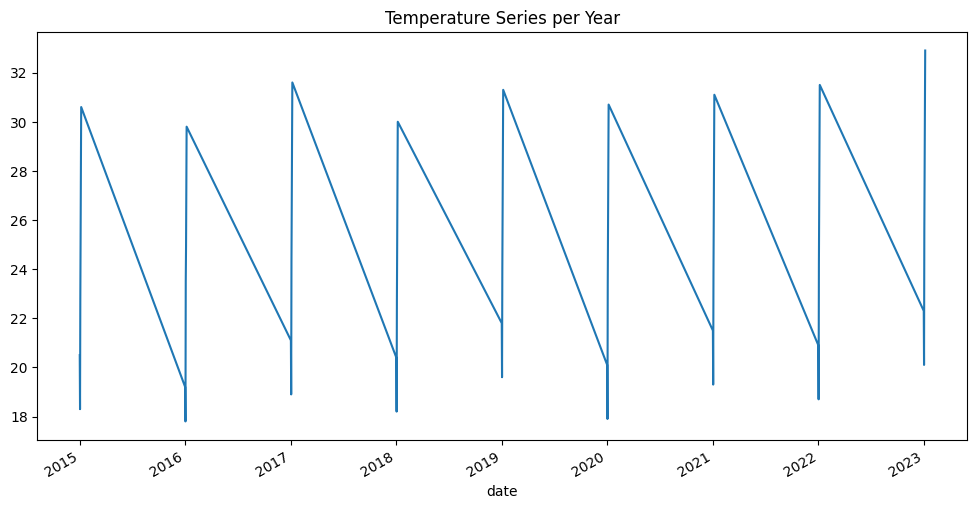

In [4]:
data['temperature'].plot(figsize=(12, 6))
plt.title('Temperature Series per Year')
plt.show()

In [6]:
model = ARIMA(data['temperature'], order=(5, 1, 0))
results = model.fit()

In [7]:
forecast_periods = 7
forecast = results.get_forecast(steps=forecast_periods)


In [8]:
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [9]:
last_date = data.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, forecast_periods + 1)]

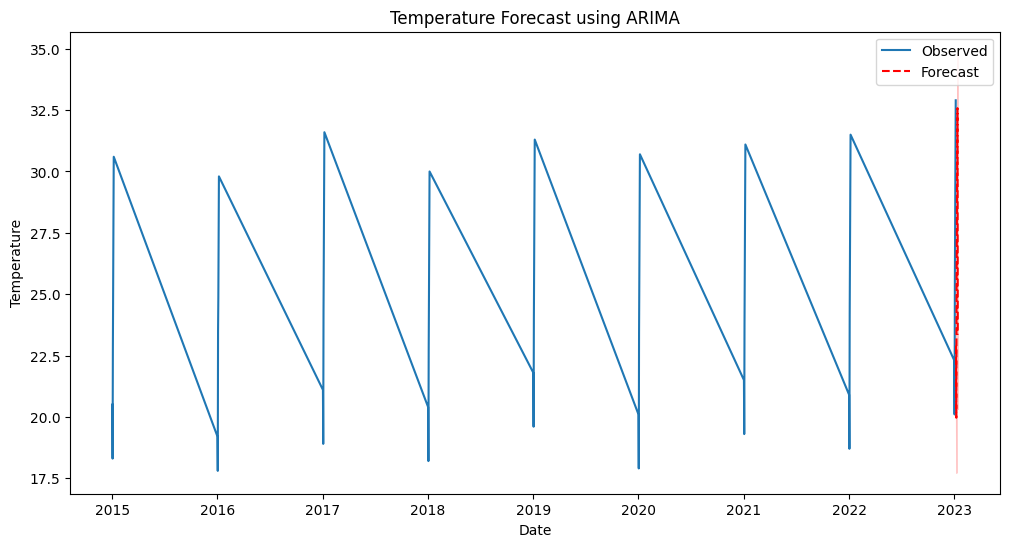

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['temperature'], label='Observed')
plt.plot(future_dates, forecast_values, label='Forecast', linestyle='dashed', color='red')
plt.fill_between(future_dates, confidence_intervals['lower temperature'], confidence_intervals['upper temperature'], color='red', alpha=0.2)
plt.title('Temperature Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [11]:
model_wind = ARIMA(data['wind'], order=(5, 1, 0))
results_wind = model_wind.fit()
forecast_wind = results_wind.get_forecast(steps=forecast_periods)
forecast_values_wind = forecast_wind.predicted_mean
confidence_intervals_wind = forecast_wind.conf_int()

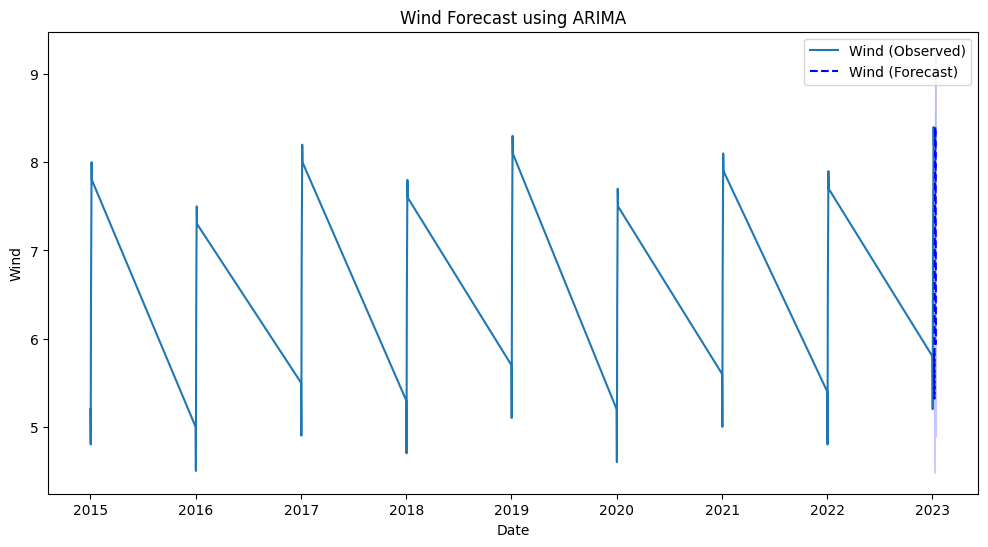

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['wind'], label='Wind (Observed)')
plt.plot(future_dates, forecast_values_wind, label='Wind (Forecast)', linestyle='dashed', color='blue')
plt.fill_between(future_dates, confidence_intervals_wind['lower wind'], confidence_intervals_wind['upper wind'], color='blue', alpha=0.2)
plt.title('Wind Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Wind')
plt.legend()
plt.show()

In [14]:
model_humidity = ARIMA(data['humidity'], order=(5, 1, 0))
results_humidity = model_humidity.fit()
forecast_humidity = results_humidity.get_forecast(steps=forecast_periods)
forecast_values_humidity = forecast_humidity.predicted_mean
confidence_intervals_humidity = forecast_humidity.conf_int()


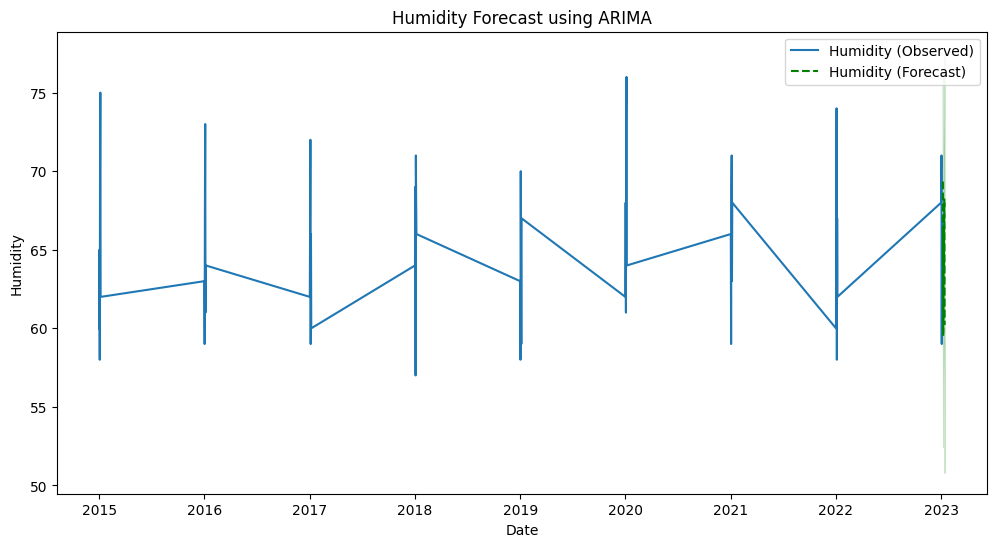

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['humidity'], label='Humidity (Observed)')
plt.plot(future_dates, forecast_values_humidity, label='Humidity (Forecast)', linestyle='dashed', color='green')
plt.fill_between(future_dates, confidence_intervals_humidity['lower humidity'], confidence_intervals_humidity['upper humidity'], color='green', alpha=0.2)
plt.title('Humidity Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier

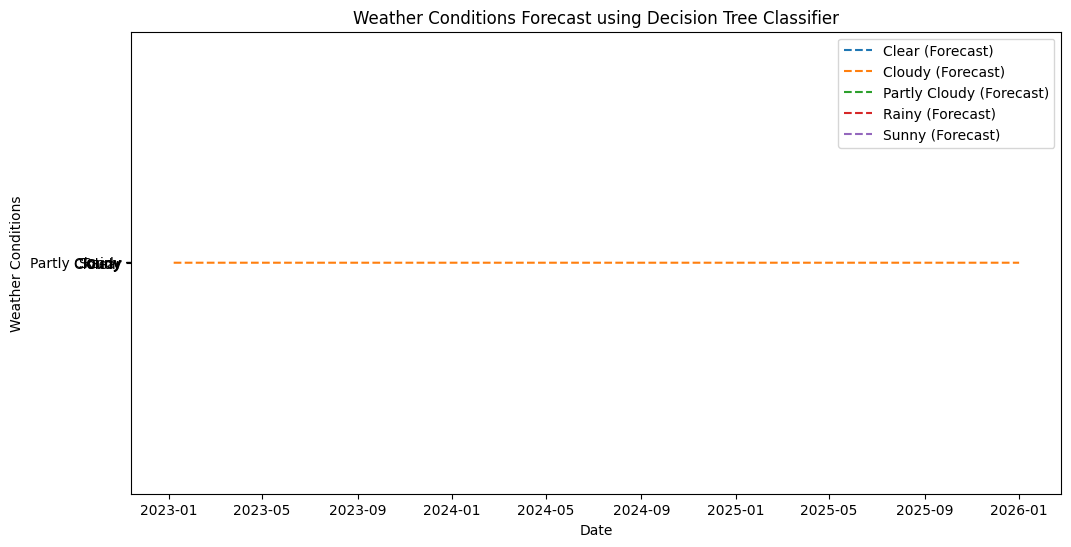

In [18]:
X = data[['temperature', 'wind', 'humidity']]
y = data['weather']
forecast_start_date = data.index[-1] + timedelta(days=1)
forecast_end_date = pd.to_datetime('2026-01-01')
future_dates = pd.date_range(forecast_start_date, forecast_end_date)
forecast_df = pd.DataFrame(index=future_dates, columns=['temperature', 'wind', 'humidity'])
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
forecast_weather = clf.predict(forecast_df)
weather_conditions = np.unique(y)
plt.figure(figsize=(12, 6))
for condition in weather_conditions:
    condition_mask = (forecast_weather == condition)
    plt.plot(forecast_df.index[condition_mask], np.full_like(forecast_df.index[condition_mask], weather_conditions.tolist().index(condition)),
             label=f'{condition} (Forecast)', linestyle='dashed')

plt.title('Weather Conditions Forecast using Decision Tree Classifier')
plt.xlabel('Date')
plt.yticks(range(len(weather_conditions)), weather_conditions)
plt.ylabel('Weather Conditions')
plt.legend()
plt.show()